In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from faker import Faker
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [4]:
fake = Faker()

def generate_sample():
    L = round(random.uniform(0.8, 2.5), 2)
    t = round(random.uniform(0.4, 0.7), 2)
    g_calculated = round((2 * L) / (t**2), 2)
    most_probable_planet = "Tierra" if abs(g_calculated - 9.8) < abs(g_calculated - 9.0) else "Saturno"
    second_most_probable_planet = "Saturno" if most_probable_planet == "Tierra" else "Tierra"
    
    return {
        "ID": fake.uuid4(),
        "Longitud (m)": L,
        "Tiempo (s)": t,
        "g_calculado (m/s²)": g_calculated,
        "Planeta más probable": most_probable_planet,
        "2do más probable": second_most_probable_planet}

       Longitud (m)  Tiempo (s)  g_calculado (m/s²)
count    100.000000  100.000000          100.000000
mean       1.707700    0.544100           12.496900
std        0.463081    0.083764            5.458598
min        0.820000    0.400000            4.050000
25%        1.402500    0.480000            8.920000
50%        1.710000    0.540000           11.475000
75%        2.075000    0.620000           15.352500
max        2.490000    0.690000           29.510000


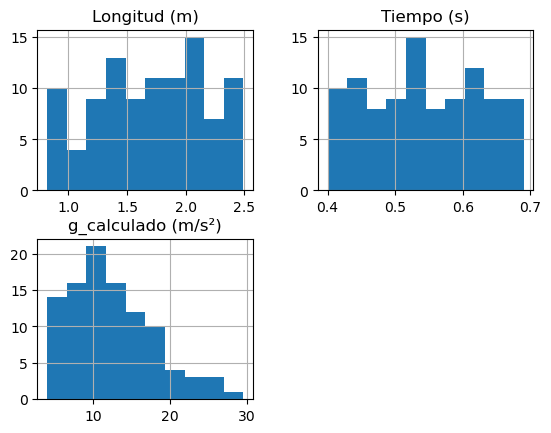

In [5]:
dataset = [generate_sample() for _ in range(100)]

# Crear el DataFrame con el dataset
df = pd.DataFrame(dataset)

# Estadísticas descriptivas
print(df.describe())

# Histogramas
df.hist(column=["Longitud (m)", "Tiempo (s)", "g_calculado (m/s²)"])
plt.show()

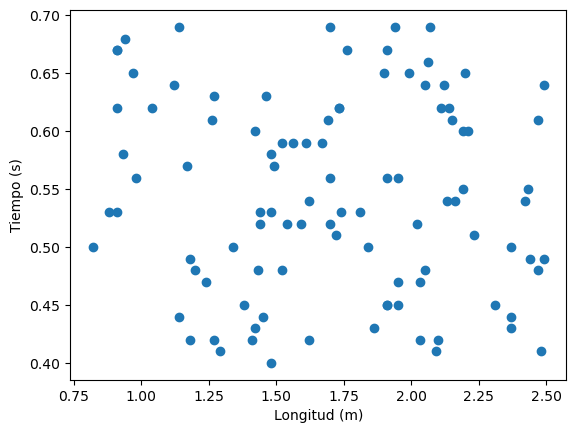

In [6]:
# Gráfico de dispersión
plt.scatter(df["Longitud (m)"], df["Tiempo (s)"])
plt.xlabel("Longitud (m)")
plt.ylabel("Tiempo (s)")
plt.show()

In [8]:
label_encoder = LabelEncoder()
df["Planeta más probable (código)"] = label_encoder.fit_transform(df["Planeta más probable"])
df["2do más probable (código)"] = label_encoder.fit_transform(df["2do más probable"])
print(df.corr())


                               Longitud (m)  Tiempo (s)  g_calculado (m/s²)  \
Longitud (m)                       1.000000   -0.093917            0.665778   
Tiempo (s)                        -0.093917    1.000000           -0.761963   
g_calculado (m/s²)                 0.665778   -0.761963            1.000000   
Planeta más probable (código)      0.535812   -0.617009            0.689591   
2do más probable (código)         -0.535812    0.617009           -0.689591   

                               Planeta más probable (código)  \
Longitud (m)                                        0.535812   
Tiempo (s)                                         -0.617009   
g_calculado (m/s²)                                  0.689591   
Planeta más probable (código)                       1.000000   
2do más probable (código)                          -1.000000   

                               2do más probable (código)  
Longitud (m)                                   -0.535812  
Tiempo (s)            

In [ ]:
X = df["Longitud (m)"].values.reshape(-1, 1)
y = df["Tiempo (s)"].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# Gráfico de regresión lineal
plt.scatter(X, y, color="blue")
plt.plot(X, y_pred, color="red")
plt.xlabel("Longitud (m)")
plt.ylabel("Tiempo (s)")
plt.show()